# Introduction to Jupyter Notebooks http://jupyter.org

Tutorial by Javier Sánchez

**Requirements:**
 * anaconda (includes jupyter, astropy, numpy, scipy and matplotlib)
 * seaborn (pip install seaborn or conda install seaborn)
 * bokeh (pip install bokeh or conda install bokeh)

Jupyter creates an easy-to-read document that you can view in your web-browser with code (that runs and creates plots inside the document on the fly!) and text (with even math). The name "Jupyter" is a combination of Julia, Python, and R. However, it has support for over 40 programming languages. Jupyter is based on iPython notebooks, and, in fact you can still launch jupyter by typing ```ipython notebook``` on your terminal.

## 1) How to launch Jupyter

You can launch a Jupyter notebook by just typing ```jupyter notebook``` on your terminal and this will open a new tab or window on your default browser. You can also select a different browser by setting the environment variable ```$BROWSER``` to the path of the browser that you want to use before launching or using the ```--browser``` option in the command line. In Windows under "Search programs and files" from the Start menu, type ```jupyter notebook``` and select "Jupyter notebook."

## 2) Cells

A Jupyter notebook consists on a JSON document. Each segment of this document is a cell. There are several types of cells but we are interested mainly in two:

**2.1. Markdown cells**: Markdown cells are used for body-text, the format is as defined in GitHub-flavored markdown. A fast cheatsheet can be found here: https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet

**2.2 Code cells**: These contain source code in the language of the document’s associated kernel.

More info: https://ipython.org/ipython-doc/3/notebook/nbformat.html

## 3) Getting Started: Boilerplate and "magic functions"

We will now focus on Python. To start a notebook it is a good practice to import all the packages and define the styles that we want to use in our "boilerplate". A typical example could be:

```import numpy as np
import matplotlib.pyplot as plt```

With these commands we set up our notebook to use the numpy package and the matplotlib package. If we use them like that, the plots will pop-up in a new window instead of being shown in the notebook. To see them in the notebook we should use a "magic function".

There are two kinds of magics, line-oriented and cell-oriented. Line magics are prefixed with the % character and work much like OS command-line calls: they get as an argument the rest of the line, where arguments are passed without parentheses or quotes. Cell magics are prefixed with a double %%, and they are functions that get as an argument not only the rest of the line, but also the lines below it in a separate argument. A useful example is:

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


The magic ```%pylab``` sets up the interactive namespace from numpy and matplotlib and ```inline``` adds the plots to the notebook. These plots are rendered in PNG format by default.

More useful magic commands:

 * ```%time``` ```%timeit``` measure execution time.
 * ```%run``` runs a Python script and loads all its data on the interactive namespace.
 * ```%config InlineBackend.figure_formats = {'png', 'retina'}``` Enables high-resolution PNG rendering and if we change ```'png'``` by ```'svg'``` or any other format we change the format of the redered plots.
 * ```%matplotlib inline``` just makes the plots to appear in the notebook. The difference with ```%pylab inline``` is that the latter also imports matplotlib.pyplot and numpy. For this one you have to import matplotlib.pyplot first.

Command line magic: You can run any system shell command using ```!``` before it. Example:

In [2]:
!ls

LICENSE               README.md             TutorialJupyter.ipynb


Advanced magic commands:

 * ```%load_ext Cython```
 * ```%cython``` or ```%%cython```

More on "magics": 
 * https://ipython.org/ipython-doc/3/interactive/magics.html
 * https://ipython.org/ipython-doc/3/interactive/tutorial.html

## 4) Plotting

### 4.1) Matplotlib  (http://matplotlib.org)

This is the most widespread package for plotting in Python. There are tons of examples on the web, and it is very well integrated in Jupyter.

Example: Let's plot a sinusoidal wave using matplotlib. (It is imported already since we used the magic ```%pylab inline```)

In [3]:
#First we are going to set up the plots to be SVGs instead of the default PNGs

### SKIP THIS CELL IF YOU WANT TO KEEP THE PNG FORMAT

%config InlineBackend.figure_formats = {'svg',}

In [4]:
#We will sample the function in 100 points from 0 to pi
x = np.linspace(0,np.pi,100)
#We compute the sine of the numpy array x
y = np.sin(x)

(-0.05, 1.05)

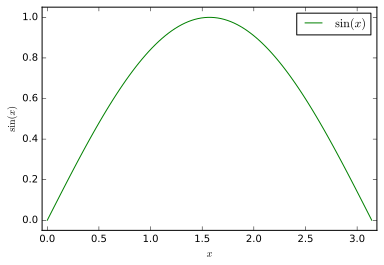

In [5]:
#We make the plot (it automatically generates the figure)
plt.plot(x,y,'-',color='green',label='$\sin(x)$')
#We add the label to the X and Y axes
plt.xlabel('$x$')
plt.ylabel('$\sin(x)$')
#We generate the legend
plt.legend()
#We change the limits of the X and Y axes
plt.xlim(-0.05,np.pi+0.05)
plt.ylim(-0.05,1.05)

**Exercise: Generate and plot a 2D histogram using matplotlib**

### 4.2) Seaborn (https://web.stanford.edu/~mwaskom/software/seaborn/)

Seaborn is a Python package based on matplotlib that includes some convenient plotting functions for statistical analysis. (Some people also like more its default style)

In [6]:
#First let's import seaborn (a warning will appear because it conflicts with %pylab inline)
import seaborn as sns

/Users/javiers/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


(-0.05, 1.05)

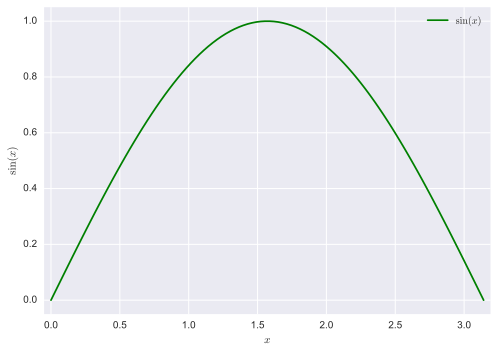

In [7]:
#Compare with matplotlib style (you can still use the same commands but they will render in seaborn style)
#We make the plot (it automatically generates the figure)
plt.plot(x,y,'-',color='green',label='$\sin(x)$')
#We add the label to the X and Y axes
plt.xlabel('$x$')
plt.ylabel('$\sin(x)$')
#We generate the legend
plt.legend()
#We change the limits of the X and Y axes
plt.xlim(-0.05,np.pi+0.05)
plt.ylim(-0.05,1.05)

/Users/javiers/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


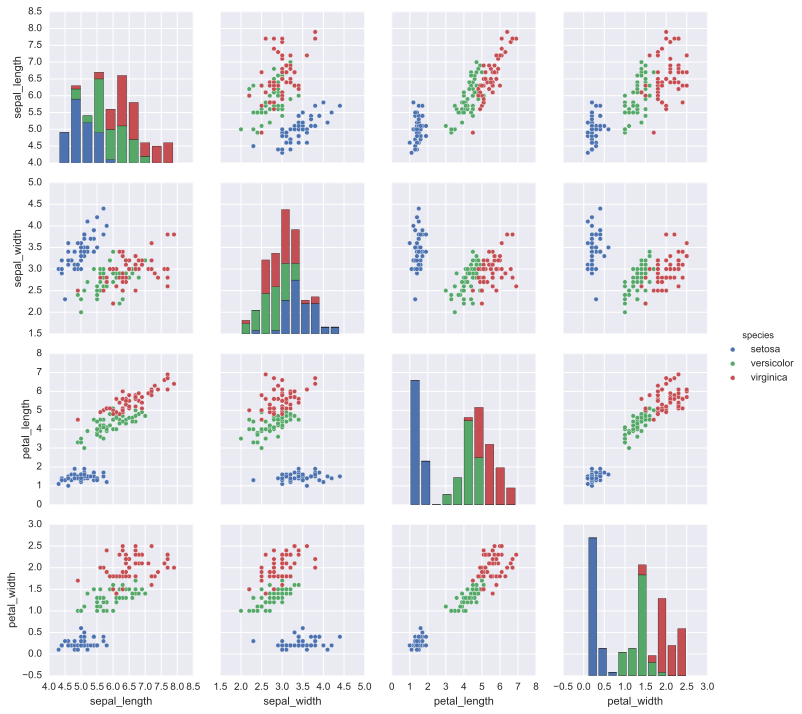

In [8]:
#Load and visualize a seaborn example
#(code from https://web.stanford.edu/~mwaskom/software/seaborn/examples/scatterplot_matrix.html)
sns.set()

df = sns.load_dataset("iris")
sns.pairplot(df, hue="species")

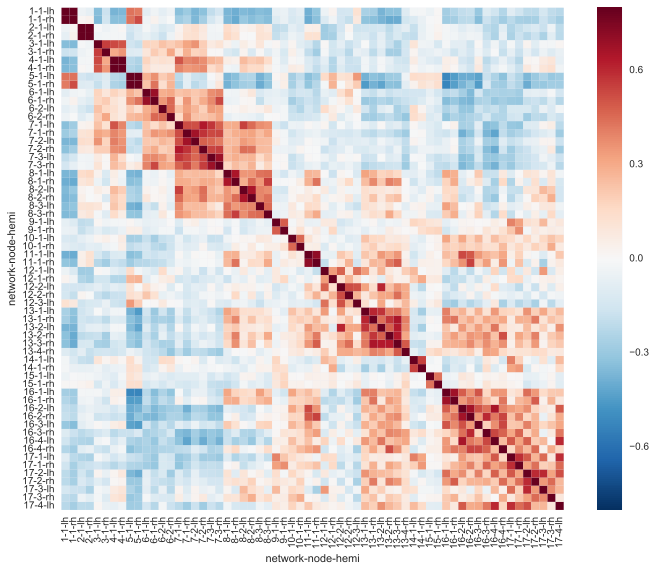

In [9]:
#Another example in this case of a correlation matrix 
#(code extracted from: https://web.stanford.edu/~mwaskom/software/seaborn/examples/network_correlations.html)
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)
corrmat = df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)

**Exercise: Plot again your 2D histogram using seaborn jointplot (https://web.stanford.edu/~mwaskom/software/seaborn/examples/hexbin_marginals.html)**

### 4.3) Bokeh (http://bokeh.pydata.org/en/latest/)

Bokeh (apparently pronounced Boh-kay) is an interactive visualization tool in Python and it works very well within jupyter.

In [10]:
# Import Bokeh modules for interactive plotting
import bokeh.io
import bokeh.mpl
import bokeh.plotting

In [11]:
# Set up Bokeh for inline viewing
bokeh.io.output_notebook()

BokehJS successfully loaded.

In [12]:
#Let's make an interactive plot from our sine wave example
#We make the plot (it automatically generates the figure)
plt.plot(x,y,'-',color='green',label='$\sin(x)$')
#We add the label to the X and Y axes
plt.xlabel('$x$')
plt.ylabel('$\sin(x)$')
#We generate the legend
plt.legend()
#We change the limits of the X and Y axes
plt.xlim(-0.05,np.pi+0.05)
plt.ylim(-0.05,1.05)
# Make it interactive with Bokeh
bokeh.plotting.show(bokeh.mpl.to_bokeh())

In [13]:
#we import interact to make an interactive plot
from ipywidgets import interact

**Example: Making an interactive plot with different probability distributions**

In [18]:
#We are going to plot some probability distributions so we import scipy.stats
from scipy import stats
xd = np.linspace(0,10,100)
dist = stats.norm(0,1)
#We have to initialize the plot somehow so we choose a gaussian pdf
yd=dist.pdf(xd)
#pp is going to be the name of our plot
pp = bokeh.plotting.figure(title="Probability distribution plot", plot_height=300, plot_width=600, y_range=(0.05,1.05))
#rr is going to be our line
rr = pp.line(xd,yd,color="red",line_width=3)

In [19]:
#Now we make a function of 3 parameters, the name f that is going to be the type of pdf that we select
#and par1, par2 that are the value of two parameters of these distributions (mean,sigma etc)
def pdist(f,par1=0,par2=1):
    if f=="Gaussian": dist = stats.norm(par1,par2); rr.data_source.data['y']=dist.pdf(xd)
    if f=="Uniform": dist = stats.uniform(par1,par2); rr.data_source.data['y']=dist.pdf(xd)
    if f=="Binomial": dist = stats.binom(par1,par2); rr.data_source.data['y']=dist.pmf(xd)
    if f=="Poisson": dist = stats.poisson(par1); rr.data_source.data['y']=dist.pmf(xd)
    if f=="Cauchy": dist = stats.cauchy(par1,par2); rr.data_source.data['y']=dist.pdf(xd)
    if f=="Laplace": dist = stats.laplace(par1,par2); rr.data_source.data['y']=dist.pdf(xd)
    if f=="Chi2": dist = stats.chi2(par1); rr.data_source.data['y']=dist.pdf(xd)
    if f=="Student t": dist = stats.t(par1); rr.data_source.data['y']=dist.pdf(xd)
    if f=="Fisher f": dist = stats.f(par1,par2); rr.data_source.data['y']=dist.pdf(xd)
    if f=="Beta": dist = stats.beta(par1,par2); rr.data_source.data['y']=dist.pdf(xd)
    if f=="Gamma": dist = stats.gamma(par1,par2); rr.data_source.data['y']=dist.pdf(xd)
    if f=="Weibull": dist = stats.dweibull(par1,0,par2); rr.data_source.data['y']=dist.pdf(xd)
    
    bokeh.io.push_notebook()

In [20]:
#We show the plot using the bokeh.plotting.show command
bokeh.plotting.show(pp)

In [21]:
#Now we make the interactive plot using the interact command
#we specify the values of the parameters as lists or ranges
interact(pdist,f=["Gaussian","Uniform","Binomial","Poisson","Cauchy",
                  "Chi2","Laplace","Student t","Fisher f","Beta","Gamma","Weibull"],par1=(0,10),par2=(0,10))